# Problem 2.55
page 84

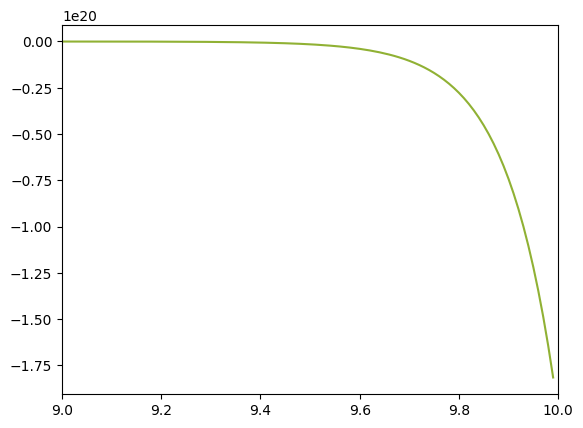

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

K = 1.1

def solvr(Y, t):
    return [Y[1], ((t ** 2) - K) * Y[0]]

a_t = np.arange(0.0, 10.0, 0.01)
asol = integrate.odeint(solvr, [1, 0], a_t)

ax = plt.gca()
ax.set_xlim([9, 10])
plt.plot(a_t, asol[:, 1], color='xkcd:avocado')

# Problem 2.56

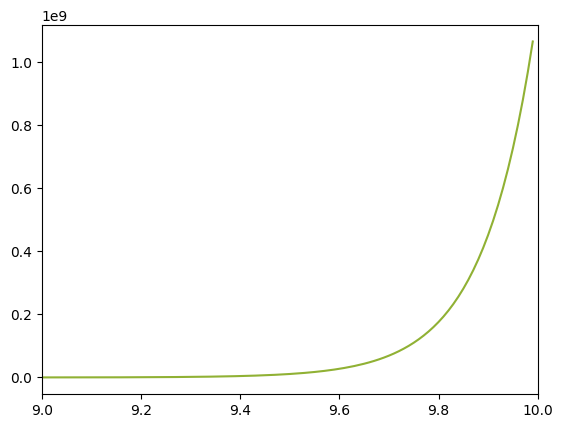

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

K = 7

def solvr(Y, t):
    return [Y[1], ((t ** 2) - K) * Y[0]]

a_t = np.arange(0.0, 10.0, 0.01)
asol = integrate.odeint(solvr, [0, 1], a_t)

ax = plt.gca()
ax.set_xlim([9, 10])
plt.plot(a_t, asol[:, 0], color='xkcd:avocado')

The answers are 3,5,7

# Problem 2.57

The idea here is that we increase the value of $K$ until we obtain a new node at $x = 1$. That value of K will give us the energy 
$$E = \frac{\hslash^2K^2}{2m}. $$
Remember that in this case $a = 1$.

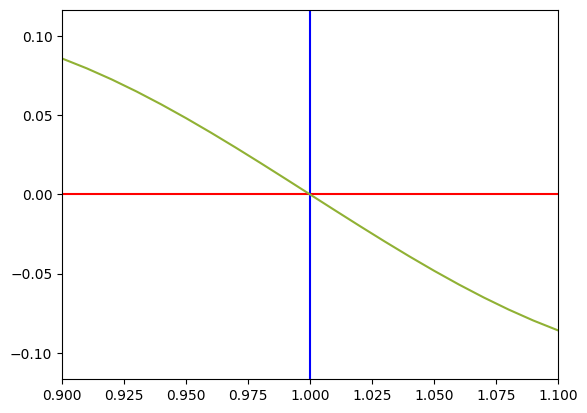

In [184]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

K = 9.425

def solvr(Y, t):
    return [Y[1],  - K * K * Y[0]]

a_t = np.arange(0.0, 1.5, 0.01)
asol = integrate.odeint(solvr, [0, 1], a_t)

ax = plt.gca()
ax.set_xlim([0.9, 1.1])
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axvline(x=1.0, color='b', linestyle='-')
plt.plot(a_t, asol[:, 0], color='xkcd:avocado')

The first four values of $K$ are (approx): 3.14, 6.285, 9.425. 12.565. Yes, they are not to 5 sig. fig. I aint got time for dat.

# Problem 2.59
a)

$$a = \bigg(\frac{2m^2g}{h^2}\bigg)^{\frac{1}{3}}$$
$$\epsilon = \bigg(\frac{2}{mh^2g^2}\bigg)^{\frac{1}{3}}E$$

Eq(f(z), C1*airyai(z - 3) + C2*airybi(z - 3))


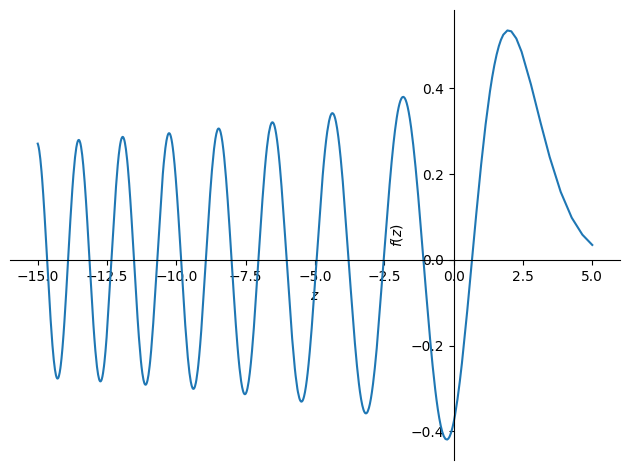

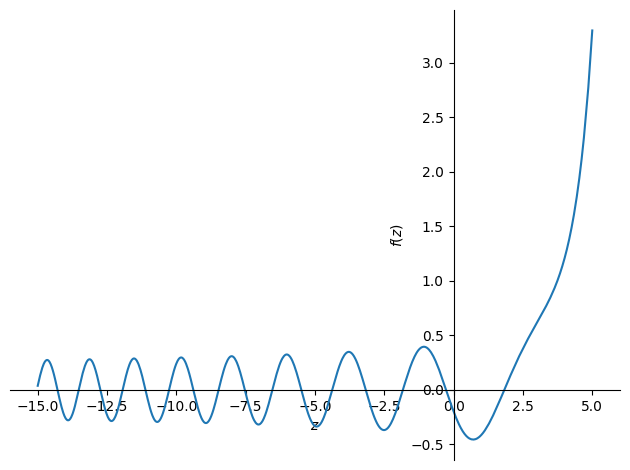

In [2]:
import sympy as sym
import numpy as np

z = sym.Symbol('z')
e = 3
f = sym.Function('f')

edo = sym.diff(f(z), z , 2) + (e - z) * f(z)
soln = sym.dsolve(edo, f(z))
print(soln)

C1, C2 = sym.symbols("C1, C2")

# we pick out the first Airy function and the second Airy function
sym.plot(soln.rhs.subs({C1: 1, C2: 0}), (z, -15, 5))
sym.plot(soln.rhs.subs({C1: 0, C2: 1}), (z, -15, 5))


the second of these functions appears to go to infinity, so we are going to bin it. Since we only have one function left, we only have one constant to search for. We will get this by normalisation later on. Remember our general solution?

In [3]:
print(soln.rhs)

C1*airyai(z - 3) + C2*airybi(z - 3)


where 3 is our value for $\epsilon$ and $C_2 = 0$. We use our other boundary condition, $\psi(0) = 0$, to find $\epsilon_1, \epsilon_{10}$. 
$$ \psi(0) = C_1 \text{Ai}(-\epsilon) = 0$$

In [4]:
import scipy as sp
a, ap, ai, aip = sp.special.ai_zeros(10)
print(a[0], a[9])

-2.3381074104597674 -12.828776752865757


Hence $\epsilon_1 = 2.338, \epsilon_{10} = 12.828$.

$$\psi_i(x) = D_i \text{Ai}(x - \epsilon_i)$$

$$1 = \int_0^\infty|\psi_i(x)|^2 dx = \int_0^\infty D_i^2 \text{Ai}^2(x-\epsilon_i) dx = \int_{-\epsilon_i}^\infty D_i^2 \text{Ai}^2(x) dx$$ we can obtain these numerically below:

In [5]:
import numpy as np

res_1 = sp.integrate.quad(lambda x: sp.special.airy(x)[0]**2, -2.338, np.inf)
res_10 = sp.integrate.quad(lambda x: sp.special.airy(x)[0]**2, -12.828, np.inf)

print(res_1[0], res_10[0])

0.49169661790042557 1.1401837254761968


Here are the normalisation constants I was on about earlier. 

$$\psi_1(x) = (0.4917)^{-\frac{1}{2}} \text{Ai}(x - 2.338)$$
$$\psi_{10}(x) = (1.1402)^{-\frac{1}{2}} \text{Ai}(x - 12.828)$$

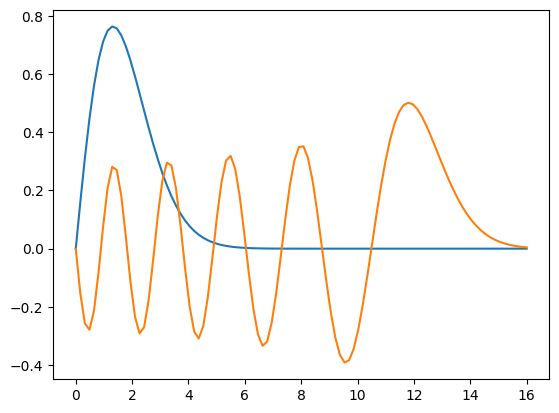

In [6]:
P1 = lambda x: (0.4917) ** (-0.5) * sp.special.airy(x-2.338)[0]
P10 = lambda x: (1.1402) ** (-0.5) * sp.special.airy(x-12.828)[0]

x  = np.linspace(0,16,100)
y1  = [P1(val) for val in x] 
y2  = [P10(val) for val in x] 

import matplotlib.pyplot as plt
plt.plot(x,y1) # blue
plt.plot(x,y2) # yellow

In [7]:
def f(t):
    return P1(t) * P10(t)

In [8]:
inner_product = sp.integrate.quad(f, 0, np.inf)
print(inner_product)

(6.380693334861846e-05, 3.695217359790758e-09)


This is pretty much zero

b)

In [2]:
import scipy as sp
import numpy as np

P1 = lambda x: (0.4917) ** (-0.5) * sp.special.airy(x-2.338)[0]
P10 = lambda x: (1.1402) ** (-0.5) * sp.special.airy(x-12.828)[0]
P1_dash = lambda x: (0.4917) ** (-0.5) * sp.special.airy(x-2.338)[1]
P10_dash = lambda x: (1.1402) ** (-0.5) * sp.special.airy(x-12.828)[1]
epsilon_1  = 2.3381074104597674 
epsilon_10 = 12.828776752865757

In [3]:
def exp_of_x(P):
    return lambda x : x * P(x) * P(x)

def exp_of_x_squared(P):
    return lambda x : x * x * P(x) * P(x)

h = sp.constants.hbar

def exp_of_p(P, P_dash):
    return lambda x : h * P(x) * P_dash(x)

def exp_of_p_squared(P, epsilon):
    return lambda x : - h * h * P(x) * (x - epsilon) * P(x)

ex1 = sp.integrate.quad(exp_of_x(P1), 0, np.inf)[0]
exs1 = sp.integrate.quad(exp_of_x_squared(P1), 0, np.inf)[0]
sdx1 = np.sqrt(exs1 - ex1 ** 2)
ep1 = sp.integrate.quad(exp_of_p(P1, P1_dash), 0, np.inf)[0]
eps1 = sp.integrate.quad(exp_of_p_squared(P1, epsilon_1), 0, np.inf)[0]
sdp1 = np.sqrt(eps1 + ep1 ** 2)
print("ex1: ", ex1)
print("exs1: ", exs1)
print("sdx1: ", sdx1)
print("ep1: ", ep1)
print("eps1: ", eps1)
print("sdp1: ", sdp1 / h, "h")
print("sdx1 x sdp1: ", sdx1 * sdp1 / h, "h")
print('\n')

ex10 = sp.integrate.quad(exp_of_x(P10), 0, np.inf)[0]
exs10 = sp.integrate.quad(exp_of_x_squared(P10), 0, np.inf)[0]
sdx10 = np.sqrt(exs10 - ex10 ** 2)
ep10 = sp.integrate.quad(exp_of_p(P10, P10_dash), 0, np.inf)[0]
eps10 = sp.integrate.quad(exp_of_p_squared(P10, epsilon_10), 0, np.inf)[0]
sdp10 = np.sqrt(eps10 + ep10 ** 2)
print("ex10: ", ex10)
print("exs10: ", exs10)
print("sdx10: ", sdx10)
print("ep10: ", ep10)
print("eps10: ", eps10)
print("sdp10: ", sdp10 / h, "h")
print("sdx1 x sdp1: ", sdx10 * sdp10 / h, "h")

ex1:  1.5586201423249575
exs1:  2.9152431165119856
sdx1:  0.6970985356826643
ep1:  1.0441753328154444e-39
eps1:  8.668805261730253e-69
sdp1:  0.8828836259659869 h
sdx1 x sdp1:  0.6154568828390906 h


ex10:  8.551619021344424
exs10:  87.760135165312
sdx10:  3.8249114080057116
ep10:  -2.0119408848622578e-35
eps10:  3.34322119276716e-68
sdp10:  1.7442943775452278 h
sdx1 x sdp1:  6.671771463592964 h


In both cases the uncertainty principle is satisfied. The value for the standard deviation of momentum for $\psi_{10}$ is off a bit, not sure why. Hence $\sigma_x \sigma_p$ is off a bit too.

c)


The maths is pretty easy. Just need to use problem 1.11 to show that the classical density is $$\rho = \frac{1}{v(x)T}.$$ Then find $v$ from $$ \frac{1}{2} m v^2 + mgx = E.$$ Then finally use: $$E = mgh \text{  and   } h = \frac{1}{2}gT^2.$$

In [4]:
def rho_quantum(x):
    return P10(x) * P10(x)

def rho_classical(x):
    return 1 / (2 * np.sqrt(epsilon_10 * (epsilon_10 - x)))

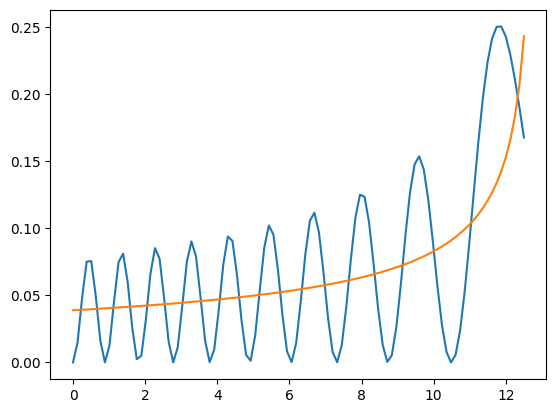

In [5]:
x  = np.linspace(0,12.5,100)
y1  = [rho_quantum(val) for val in x] 
y2  = [rho_classical(val) for val in x] 

import matplotlib.pyplot as plt
plt.plot(x,y1) # blue - quantum
plt.plot(x,y2) # yellow - classical

# 2.60

parts a) and b) are provided in the solution manual. c) is not possible in python, at least for the time being. Complex order Bessel functions are not a thing in python for the time being.